In [11]:
#import files
import os
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas import DataFrame
from pathlib import Path

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [12]:
# from imblearn import undersampling

In [13]:
#read from csv file 
csv_path = list(Path(os.path.join("..","data")).rglob("glass3.csv"))[0]
df = pd.read_csv(csv_path)

# 214 examples; 9 features ; binary class
# show all data, examples and labels
display(df.head())
display(df.info())
display(df.describe().T)


,v1,v2,v3,v4,v5,v6,v7,v8,v9,class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   v1      214 non-null    float64
 1   v2      214 non-null    float64
 2   v3      214 non-null    float64
 3   v4      214 non-null    float64
 4   v5      214 non-null    float64
 5   v6      214 non-null    float64
 6   v7      214 non-null    float64
 7   v8      214 non-null    float64
 8   v9      214 non-null    float64
 9   class   214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


None

,count,mean,std,min,25%,50%,75%,max
v1,214.0,1.518365,0.003037,1.51115,1.516522,1.51768,1.519157,1.53393
v2,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
v3,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
v4,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
v5,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
v6,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
v7,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
v8,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
v9,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000
class,214.0,0.079439,0.271057,0.00000,0.000000,0.00000,0.000000,1.00000


In [14]:
X = df.values[:, 0:9]
y = df.values[:, 9]

[(0.0, 197), (1.0, 17)]


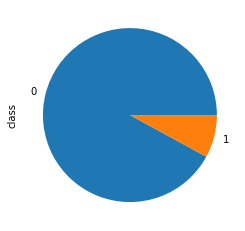

In [16]:
print(sorted(Counter(y).items()))
df["class"].value_counts().plot(kind="pie")

In [ ]:
X

In [ ]:
y

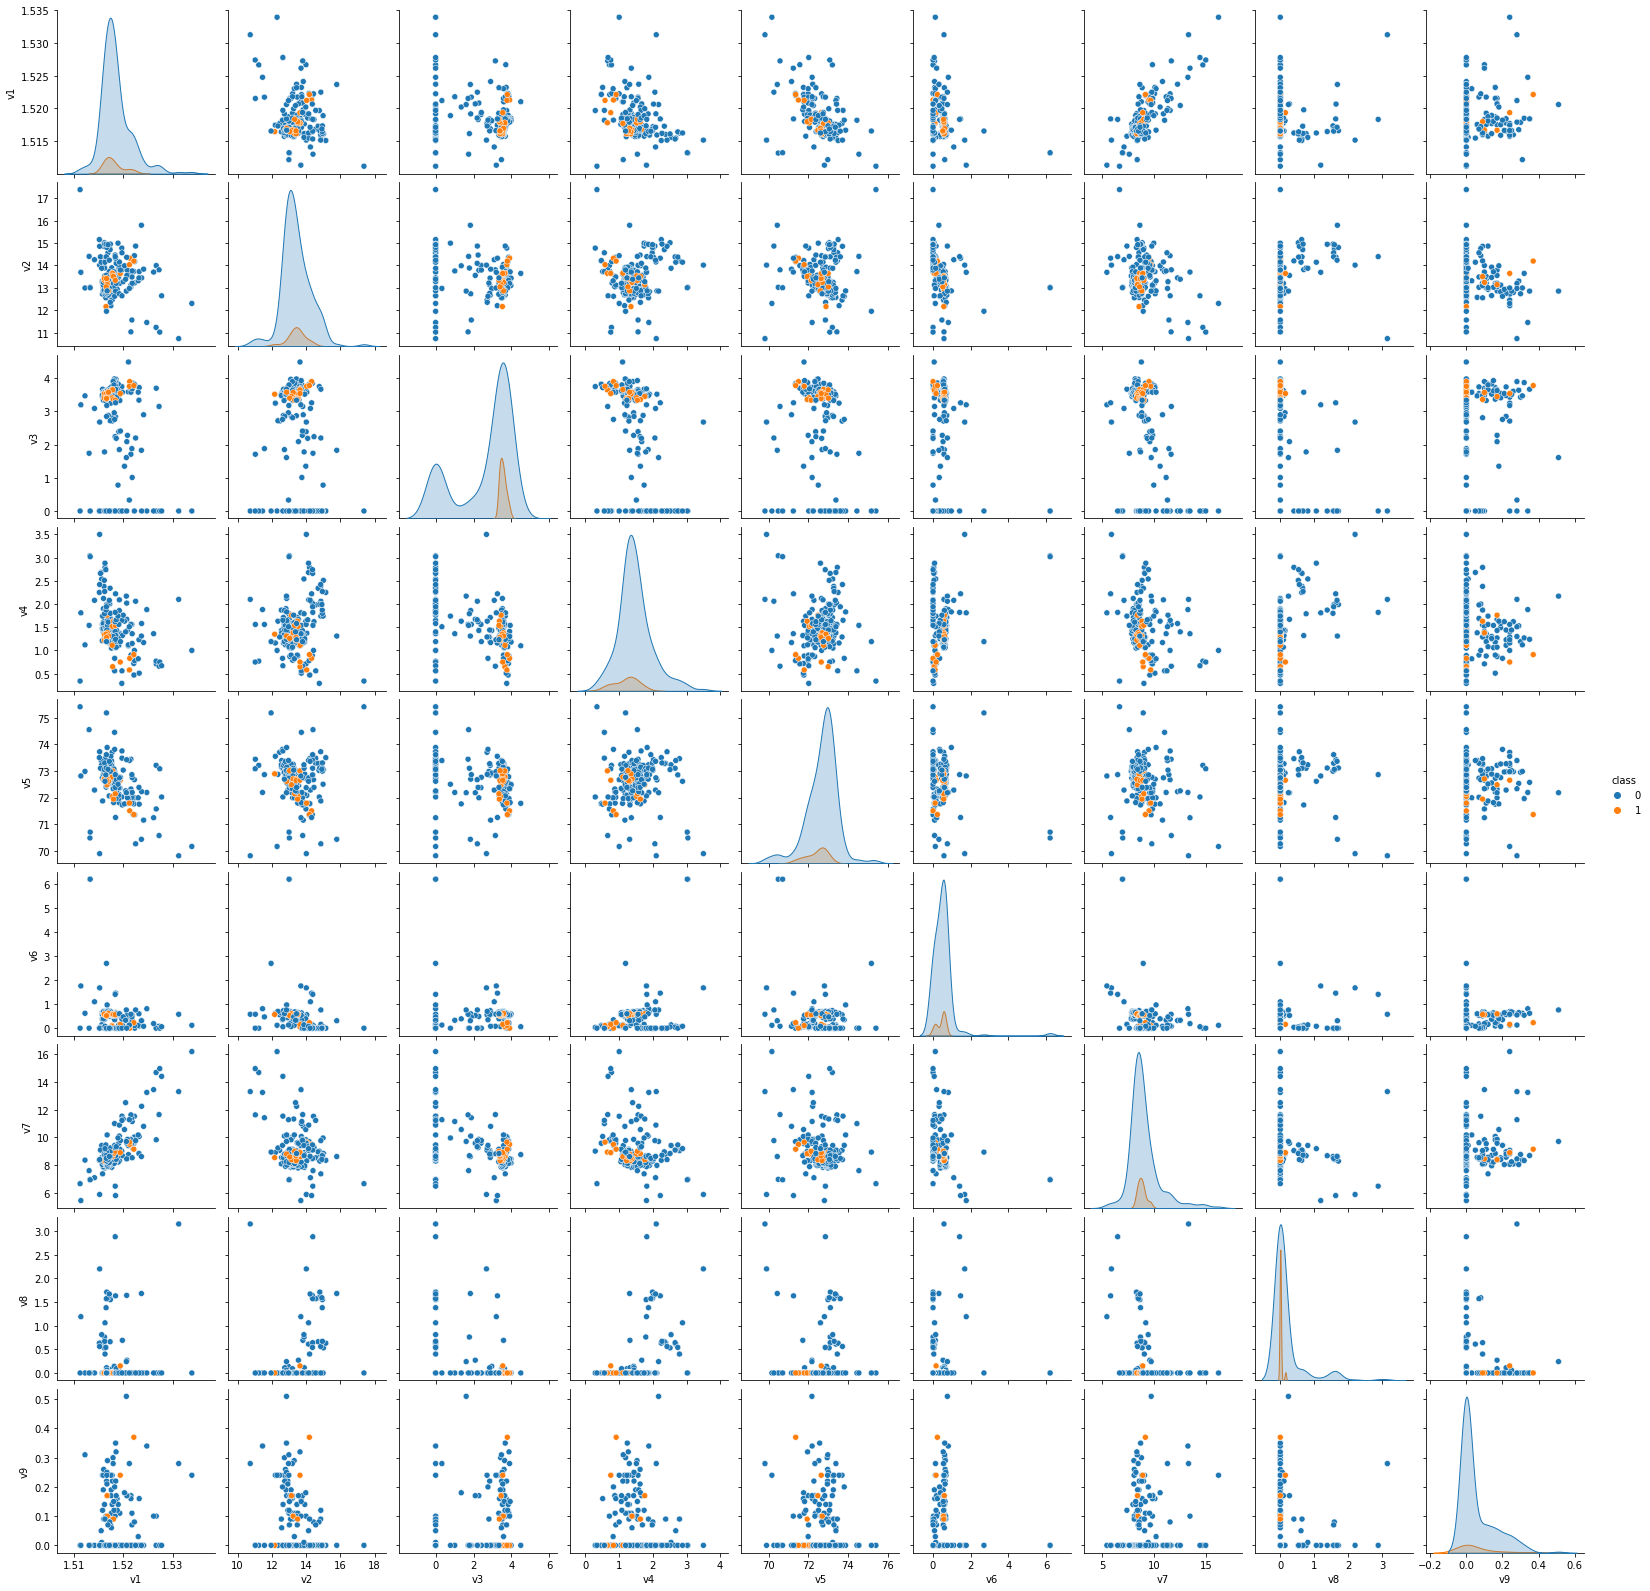

In [17]:
import seaborn as sns
sns.pairplot(df, hue="class")

In [ ]:
#visualize the data before any work is done
dt = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = dt.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [18]:
# random undersampling
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [20]:
type(X_resampled)
X_resampled.shape

(34, 9)

In [22]:
columns = df.columns
print(columns)

Index(['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'class'], dtype='object')


In [25]:
y_resampled.reshape([])

(34,)

In [24]:
np.concatenate([X_resampled, y_resampled], axis=1)

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

In [ ]:
# number of examples after applying the algorithm
len(X_resampled)

In [ ]:
# of examples for each class
print(sorted(Counter(y_resampled).items()))

In [ ]:
#visualize the data after undersampling is complete
dt = DataFrame(dict(x=X_resampled[:,0], y=X_resampled[:,1], label=y_resampled))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = dt.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()